<a href="https://colab.research.google.com/github/AnandSaumya/Hyphenova-Pricing/blob/main/Hyphenova_Pricing_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HHYPHENOVA NETWORK (HYP.TV)
Capstone Project Analysis.

Team Members: Fahad A., Rajashree R., Saumya A.

#Problem Statement and Scope
Hyphenova, a media startup, aims to develop a pricing model to enhance its competitive edge in the media industry. The current challenge is to create a pricing strategy that incorporates various factors such as demand, popularity, content ratings, bundling options, repeat purchases, recency, and rental time. The primary objective is to design a model that optimizes pricing based on these attributes to attract more consumers and offer a flexible pricing structure. This project requires thorough analysis and modeling using synthetic data to determine the most effective pricing methodology that balances profitability with consumer appeal.

# Upload and Merging Datasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("/content/tmdb_5000_movies.csv")

In [ ]:
df2 = pd.read_csv('tmdb_5000_credits.csv')

In [ ]:
df_merged = pd.merge(df2, df, left_on='movie_id', right_on='id', how='left')

df_merged.head()

,movie_id,title_x,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
df3=pd.read_csv('/content/movie_data.csv')
df3.head()

,index,director_name,duration,actor_2_name,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,movie_imdb_link,num_user_for_reviews,language,country,title_year,imdb_score
0,0,James Cameron,178.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,2009.0,7.9
1,1,Gore Verbinski,169.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,2007.0,7.1
2,2,Sam Mendes,148.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,2015.0,6.8
3,3,Christopher Nolan,164.0,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,2012.0,8.5
4,4,Doug Walker,NaN,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,7.1


In [ ]:
df_merged = df_merged.rename(columns={'title_x': 'movie_title'})
df3['movie_title'] = df3['movie_title'].str.strip().str.replace(r'\s+', ' ', regex=True).str.lower()
df_merged['movie_title'] = df_merged['movie_title'].str.strip().str.replace(r'\s+', ' ', regex=True).str.lower()

df3['movie_title'] = df3['movie_title'].astype(str)
df_merged['movie_title'] = df_merged['movie_title'].astype(str)

# Merging the DataFrames on 'movie_title'
df = pd.merge(df3,df_merged, on='movie_title', how='inner')

# Display the combined DataFrame
df.head()

,index,director_name,duration,actor_2_name,genres_x,actor_1_name,movie_title,num_voted_users,actor_3_name,movie_imdb_link,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,0,James Cameron,178.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,avatar,886204,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,1,Gore Verbinski,169.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,pirates of the caribbean: at world's end,471220,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,2,Sam Mendes,148.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,spectre,275868,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,3,Christopher Nolan,164.0,Christian Bale,Action|Thriller,Tom Hardy,the dark knight rises,1144337,Joseph Gordon-Levitt,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,5,Andrew Stanton,132.0,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,john carter,212204,Polly Walker,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4763 entries, 0 to 4762
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4763 non-null   int64  
 1   director_name         4755 non-null   object 
 2   duration              4756 non-null   float64
 3   actor_2_name          4756 non-null   object 
 4   genres_x              4763 non-null   object 
 5   actor_1_name          4759 non-null   object 
 6   movie_title           4763 non-null   object 
 7   num_voted_users       4763 non-null   int64  
 8   actor_3_name          4750 non-null   object 
 9   movie_imdb_link       4763 non-null   object 
 10  num_user_for_reviews  4752 non-null   float64
 11  language              4755 non-null   object 
 12  country               4763 non-null   object 
 13  title_year            4755 non-null   float64
 14  imdb_score            4763 non-null   float64
 15  movie_id             

In [ ]:
unique_dataset=pd.read_csv('/content/MoviesOnStreamingPlatforms.csv')

In [ ]:
unique_dataset = unique_dataset.rename(columns={'Title': 'movie_title'})
unique_dataset.head()

,Unnamed: 0,ID,movie_title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [ ]:
# Convert movie titles to lowercase for consistency
unique_dataset['movie_title'] = unique_dataset['movie_title'].str.lower()
df['movie_title'] = df['movie_title'].str.lower()

# Merge the DataFrames on 'movie_title' using a left join
df = pd.merge(df, unique_dataset, left_on='movie_title', right_on='movie_title', how='left')

# Display the merged DataFrame
df

,index,director_name,duration,actor_2_name,genres_x,actor_1_name,movie_title,num_voted_users,actor_3_name,movie_imdb_link,...,Unnamed: 0,ID,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,James Cameron,178.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,avatar,886204,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,...,8632.0,8633.0,2009.0,13+,86/100,0.0,0.0,0.0,1.0,0.0
1,1,Gore Verbinski,169.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,pirates of the caribbean: at world's end,471220,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,...,8681.0,8682.0,2007.0,13+,81/100,0.0,0.0,0.0,1.0,0.0
2,2,Sam Mendes,148.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,spectre,275868,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Christopher Nolan,164.0,Christian Bale,Action|Thriller,Tom Hardy,the dark knight rises,1144337,Joseph Gordon-Levitt,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Andrew Stanton,132.0,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,john carter,212204,Polly Walker,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,...,8734.0,8735.0,2012.0,13+,75/100,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758,5034,Neill Dela Llana,80.0,Edgar Tancangco,Thriller,Ian Gamazon,cavite,589,Quynn Ton,http://www.imdb.com/title/tt0428303/?ref_=fn_t...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4759,5035,Robert Rodriguez,81.0,Peter Marquardt,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,el mariachi,52055,Consuelo Gómez,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4760,5037,Edward Burns,95.0,Caitlin FitzGerald,Comedy|Drama,Kerry Bishé,newlyweds,1338,Daniella Pineda,http://www.imdb.com/title/tt1880418/?ref_=fn_t...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4761,5041,Daniel Hsia,100.0,Daniel Henney,Comedy|Drama|Romance,Alan Ruck,shanghai calling,1255,Eliza Coupe,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4763 entries, 0 to 4762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4763 non-null   int64  
 1   director_name         4755 non-null   object 
 2   duration              4756 non-null   float64
 3   actor_2_name          4756 non-null   object 
 4   genres_x              4763 non-null   object 
 5   actor_1_name          4759 non-null   object 
 6   movie_title           4763 non-null   object 
 7   num_voted_users       4763 non-null   int64  
 8   actor_3_name          4750 non-null   object 
 9   movie_imdb_link       4763 non-null   object 
 10  num_user_for_reviews  4752 non-null   float64
 11  language              4755 non-null   object 
 12  country               4763 non-null   object 
 13  title_year            4755 non-null   float64
 14  imdb_score            4763 non-null   float64
 15  movie_id             

**1. movie_id:** Unique identifier for each movie.

**2. movie_title:** Title of the movie.

**3. cast:** List of main cast members in the movie.

**4. crew:** List of key crew members, including the director, producers, etc.

**5. budget:** The movie's production budget in a given currency.

**6. genres_x:** Genres associated with the movie.

**7. homepage**: URL of the movie's official homepage.

**8. id:** Another unique identifier for each movie.

**9. keywords**: List of keywords associated with the movie.

**10. original_language**: Original language in which the movie was produced.

**11. original_title:** Original title of the movie before any translations.

**12. overview:** Brief summary or synopsis of the movie's plot.

**13. popularity:** Popularity score of the movie, likely based on user interactions or view counts.

**14. production_companies:** List of production companies involved in making the movie.

**15. production_countries:** Countries where the movie was produced.

**16. release_date:** Official release date of the movie.

**17. revenue:** Total revenue generated by the movie, usually in a given currency.

**18. runtime:** Duration of the movie in minutes.

**19. spoken_languages:** Languages spoken in the movie.

**20. status:** Current status of the movie (e.g., Released, Post Production).

**21. tagline:** The movie's promotional tagline or slogan.

**22. title_y:** Another instance of the movie title, potentially redundant.

**23. vote_average:** Average rating or score given by users.

**24. vote_count:** Total number of votes or ratings the movie has received.

**25. index:** Another unique identifier, possibly used internally in the dataset.

**26. director_name:** Name of the movie's director.

**27. duration:** Another measure of the movie's duration in minutes.

**28. actor_2_name:** Name of the second main actor/actress.

**29. genres_y:** Another instance of the genres associated with the movie.

**30. actor_1_name:** Name of the first main actor/actress.

**31. num_voted_users:** Number of users who have voted or rated the movie.

**32. actor_3_name:** Name of the third main actor/actress.

**33. movie_imdb_link:** URL link to the movie's IMDb page.

**34. num_user_for_reviews:** Number of user reviews available for the movie.

**35. language:** Language used in the movie, similar to original_language.

**36. country:** Country where the movie was produced.

**37. title_year:** Year the movie was released.

**38. imdb_score:** IMDb rating score for the movie.

**39. Unnamed:** 0: Unnamed column, likely an artifact from data merging or extraction.

**40. ID:** Another identifier for the movie, possibly linked to a different dataset.

**41. Year:** Year, possibly related to release year or another time-related attribute.

**42. Age:** Age rating of the movie (e.g., PG, R).

**43. Rotten Tomatoes:** Rating from Rotten Tomatoes.

**44. Netflix:** Binary indicator (1 or 0) if the movie is available on Netflix.

**45. Hulu:** Binary indicator (1 or 0) if the movie is available on Hulu.

**46. Prime Video:** Binary indicator (1 or 0) if the movie is available on Prime Video.

**47. Disney+:** Binary indicator (1 or 0) if the movie is available on Disney+.

**48. Type:** Type of content, possibly indicating whether it's a movie or a series.

As we can see above that some columns are not benfit to resolve the problem, thus we will remove them in addtion to the duplicated columns in the data cleaning part.

In [ ]:
actors_ratings=pd.read_csv('/content/actorfilms.csv')

In [ ]:
actor_ratings_with_weighted_ratings = actors_ratings.groupby('Actor').apply(lambda x: (x['Rating'] * x['Votes']).sum() / x['Votes'].sum()).reset_index()
actor_ratings_with_weighted_ratings.columns = ['actor_name', 'weighted_avg_rating']

In [ ]:
# Merge the actor ratings with df
df = df.merge(actor_ratings_with_weighted_ratings, left_on='actor_1_name', right_on='actor_name', how='left')
df = df.merge(actor_ratings_with_weighted_ratings, left_on='actor_2_name', right_on='actor_name', how='left', suffixes=('', '_actor2'))
df = df.merge(actor_ratings_with_weighted_ratings, left_on='actor_3_name', right_on='actor_name', how='left', suffixes=('', '_actor3'))

# Drop unnecessary columns and rename for clarity
df.drop(columns=['actor_name', 'actor_name_actor2', 'actor_name_actor3'], inplace=True)
df.rename(columns={'weighted_avg_rating': 'actor_1_rating',
                          'weighted_avg_rating_actor2': 'actor_2_rating',
                          'weighted_avg_rating_actor3': 'actor_3_rating'}, inplace=True)

# Display the first few rows to confirm the changes
df.head()

,index,director_name,duration,actor_2_name,genres_x,actor_1_name,movie_title,num_voted_users,actor_3_name,movie_imdb_link,...,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,actor_1_rating,actor_2_rating,actor_3_rating
0,0,James Cameron,178.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,avatar,886204,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,...,13+,86/100,0.0,0.0,0.0,1.0,0.0,7.169509,7.131182,7.548150
1,1,Gore Verbinski,169.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,pirates of the caribbean: at world's end,471220,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,...,13+,81/100,0.0,0.0,0.0,1.0,0.0,7.056855,8.071815,7.513638
2,2,Sam Mendes,148.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,spectre,275868,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.617088,7.396144,6.638730
3,3,Christopher Nolan,164.0,Christian Bale,Action|Thriller,Tom Hardy,the dark knight rises,1144337,Joseph Gordon-Levitt,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.967154,7.976319,7.720257
4,5,Andrew Stanton,132.0,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,john carter,212204,Polly Walker,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,...,13+,75/100,0.0,0.0,0.0,1.0,0.0,6.183369,7.164536,6.246211


# Data Cleaning

In [ ]:
columns_to_drop = ['Unnamed: 0', 'ID', 'Year', 'Age', 'Rotten Tomatoes', 'Type', 'genres_y', 'title_y', 'original_title', 'runtime', 'homepage', 'index', 'keywords', 'overview',
                    'tagline','movie_imdb_link','vote_count','vote_average','status','production_countries','original_language','title_year','crew','cast','spoken_languages','id','movie_id','production_companies']


df = df.drop(columns=columns_to_drop, axis=1)
df.head()


,director_name,duration,actor_2_name,genres_x,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,...,popularity,release_date,revenue,Netflix,Hulu,Prime Video,Disney+,actor_1_rating,actor_2_rating,actor_3_rating
0,James Cameron,178.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,avatar,886204,Wes Studi,3054.0,English,...,150.437577,2009-12-10,2787965087,0.0,0.0,0.0,1.0,7.169509,7.131182,7.548150
1,Gore Verbinski,169.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,pirates of the caribbean: at world's end,471220,Jack Davenport,1238.0,English,...,139.082615,2007-05-19,961000000,0.0,0.0,0.0,1.0,7.056855,8.071815,7.513638
2,Sam Mendes,148.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,spectre,275868,Stephanie Sigman,994.0,English,...,107.376788,2015-10-26,880674609,NaN,NaN,NaN,NaN,7.617088,7.396144,6.638730
3,Christopher Nolan,164.0,Christian Bale,Action|Thriller,Tom Hardy,the dark knight rises,1144337,Joseph Gordon-Levitt,2701.0,English,...,112.312950,2012-07-16,1084939099,NaN,NaN,NaN,NaN,7.967154,7.976319,7.720257
4,Andrew Stanton,132.0,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,john carter,212204,Polly Walker,738.0,English,...,43.926995,2012-03-07,284139100,0.0,0.0,0.0,1.0,6.183369,7.164536,6.246211


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4763 entries, 0 to 4762
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   director_name         4755 non-null   object 
 1   duration              4756 non-null   float64
 2   actor_2_name          4756 non-null   object 
 3   genres_x              4763 non-null   object 
 4   actor_1_name          4759 non-null   object 
 5   movie_title           4763 non-null   object 
 6   num_voted_users       4763 non-null   int64  
 7   actor_3_name          4750 non-null   object 
 8   num_user_for_reviews  4752 non-null   float64
 9   language              4755 non-null   object 
 10  country               4763 non-null   object 
 11  imdb_score            4763 non-null   float64
 12  budget                4763 non-null   int64  
 13  popularity            4763 non-null   float64
 14  release_date          4762 non-null   object 
 15  revenue              

**Checking for Duplication**

In [ ]:
duplicate_rows = df[df.duplicated(subset=['movie_title'], keep=False)]

# Print the number of duplicate rows
print(f"Number of duplicate rows based on 'movie_title': {duplicate_rows.shape[0]}")

# Display the duplicate rows for verification
print(duplicate_rows['movie_title'].value_counts())

Number of duplicate rows based on 'movie_title': 245
movie_title
the host                         4
out of the blue                  4
ben-hur                          3
the fast and the furious         3
victor frankenstein              3
                                ..
mercury rising                   2
jack reacher                     2
unbroken                         2
the day the earth stood still    2
a dog's breakfast                2
Name: count, Length: 117, dtype: int64


In [ ]:
duplicate_rows['movie_title'].value_counts()

,count
movie_title,
the host,4
out of the blue,4
ben-hur,3
the fast and the furious,3
victor frankenstein,3
...,...
mercury rising,2
jack reacher,2
unbroken,2


In [ ]:
df = df.drop_duplicates(subset=['movie_title'], keep='first')

**Checking for Missing Values & Removing Irrelevent features**

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 director_name              8
duration                   7
actor_2_name               7
genres_x                   0
actor_1_name               4
movie_title                0
num_voted_users            0
actor_3_name              13
num_user_for_reviews      11
language                   8
country                    0
imdb_score                 0
budget                     0
popularity                 0
release_date               1
revenue                    0
Netflix                 3674
Hulu                    3674
Prime Video             3674
Disney+                 3674
actor_1_rating           758
actor_2_rating          1225
actor_3_rating          1711
dtype: int64


As you can see, this column crew is not much telling us, so we will drop it

In [ ]:
columns_with_missing_values = ['release_date',
     'director_name', 'duration', 'actor_2_name', 'actor_1_name',
    'num_voted_users', 'actor_3_name', 'num_user_for_reviews', 'language',
    'country',
]

df = df.dropna(subset=columns_with_missing_values)

In [ ]:
df.describe()

,duration,num_voted_users,num_user_for_reviews,imdb_score,budget,popularity,revenue,Netflix,Hulu,Prime Video,Disney+,actor_1_rating,actor_2_rating,actor_3_rating
count,4589.000000,4.589000e+03,4589.000000,4589.000000,4.589000e+03,4589.000000,4.589000e+03,956.000000,956.000000,956.000000,956.000000,3854.000000,3395.000000,2909.000000
mean,108.377424,8.572848e+04,276.856178,6.419634,2.966334e+07,21.914105,8.402066e+07,0.304393,0.228033,0.375523,0.186192,7.013660,6.912827,6.886672
std,22.381112,1.401777e+05,379.045438,1.105584,4.108864e+07,32.230415,1.643651e+08,0.460391,0.419784,0.484511,0.389466,0.573127,0.589900,0.605561
min,14.000000,5.000000e+00,1.000000,1.600000,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000,0.000000,4.079399,3.500000,2.198448
25%,94.000000,9.560000e+03,70.000000,5.800000,1.000000e+06,4.952735,0.000000e+00,0.000000,0.000000,0.000000,0.000000,6.686941,6.569530,6.536502
50%,104.000000,3.599000e+04,161.000000,6.500000,1.500000e+07,13.472365,2.052919e+07,0.000000,0.000000,0.000000,0.000000,7.046094,6.920215,6.885631
75%,118.000000,9.862900e+04,331.000000,7.200000,4.000000e+07,28.848842,9.560900e+07,1.000000,0.000000,1.000000,0.000000,7.411057,7.302338,7.276024
max,325.000000,1.689764e+06,5060.000000,9.300000,3.800000e+08,875.581305,2.787965e+09,1.000000,1.000000,1.000000,1.000000,8.735580,8.646555,8.887291


**Checking for zeros**

It does not make sence to have zeros in our dataset specially in term of 'budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count'

In [ ]:
# List of columns to investigate
columns_to_check = ['budget','revenue']

# Function to calculate the number of zeros and their percentage in each column
def check_zeros(df, columns):
    zero_counts = df[columns].apply(lambda col: (col == 0).sum())
    zero_percentages = zero_counts / len(df) * 100
    return pd.DataFrame({'Zero Count': zero_counts, 'Zero Percentage': zero_percentages})

# Check zeros in the specified columns
zero_summary = check_zeros(df, columns_to_check)
print(zero_summary)


         Zero Count  Zero Percentage
budget          958        20.876008
revenue        1315        28.655480


In [ ]:
df = df[df['revenue'] > 0]
df = df[df['budget'] > 0]

In [ ]:
df.describe()

,duration,num_voted_users,num_user_for_reviews,imdb_score,budget,popularity,revenue,Netflix,Hulu,Prime Video,Disney+,actor_1_rating,actor_2_rating,actor_3_rating
count,3132.000000,3.132000e+03,3132.000000,3132.00000,3.132000e+03,3132.000000,3.132000e+03,734.000000,734.000000,734.000000,734.000000,2793.000000,2496.000000,2166.000000
mean,111.797254,1.182833e+05,362.716156,6.56175,4.097256e+07,29.246629,1.220150e+08,0.326975,0.246594,0.316076,0.213896,7.046121,6.937787,6.926342
std,23.027307,1.586651e+05,426.246854,1.04198,4.459611e+07,36.456378,1.869091e+08,0.469428,0.431322,0.465260,0.410334,0.566977,0.577277,0.596179
min,37.000000,2.200000e+01,1.000000,1.60000,1.000000e+00,0.019984,5.000000e+00,0.000000,0.000000,0.000000,0.000000,4.336786,3.901451,2.198448
25%,97.000000,2.677150e+04,126.000000,6.00000,1.100000e+07,10.608187,1.727864e+07,0.000000,0.000000,0.000000,0.000000,6.725232,6.595534,6.586034
50%,107.000000,6.523550e+04,232.000000,6.60000,2.505000e+07,20.638920,5.602888e+07,0.000000,0.000000,0.000000,0.000000,7.085741,6.940997,6.920215
75%,122.000000,1.456480e+05,434.000000,7.30000,5.500000e+07,37.514625,1.478539e+08,1.000000,0.000000,1.000000,0.000000,7.454247,7.319316,7.313027
max,325.000000,1.689764e+06,5060.000000,9.30000,3.800000e+08,875.581305,2.787965e+09,1.000000,1.000000,1.000000,1.000000,8.735580,8.646555,8.887291


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3132 entries, 0 to 4759
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   director_name         3132 non-null   object 
 1   duration              3132 non-null   float64
 2   actor_2_name          3132 non-null   object 
 3   genres_x              3132 non-null   object 
 4   actor_1_name          3132 non-null   object 
 5   movie_title           3132 non-null   object 
 6   num_voted_users       3132 non-null   int64  
 7   actor_3_name          3132 non-null   object 
 8   num_user_for_reviews  3132 non-null   float64
 9   language              3132 non-null   object 
 10  country               3132 non-null   object 
 11  imdb_score            3132 non-null   float64
 12  budget                3132 non-null   int64  
 13  popularity            3132 non-null   float64
 14  release_date          3132 non-null   object 
 15  revenue               3132

import json
def extract_names(json_str):
    try:
        items = json.loads(json_str)
        return ','.join([item['name'] for item in items])
    except:
        return ''

df['genres_x'] = df['genres_x'].apply(extract_names)
#df_merged['cast'] = df_merged['cast'].apply(extract_names)

df['genres_x'] = pd.Categorical(df['genres_x'])
#df_merged['cast'] = pd.Categorical(df_merged['cast'])

This is to remove the json format form the text columns.

# Data preprocessing

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])

# Calculate the age of the movie
current_year = pd.Timestamp.now().year
df['age_of_movie'] = current_year - df['release_date'].dt.year
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df = df.drop(columns=['release_date'])

df.head()

,director_name,duration,actor_2_name,genres_x,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,...,Netflix,Hulu,Prime Video,Disney+,actor_1_rating,actor_2_rating,actor_3_rating,age_of_movie,release_year,release_month
0,James Cameron,178.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,avatar,886204,Wes Studi,3054.0,English,...,0.0,0.0,0.0,1.0,7.169509,7.131182,7.548150,15,2009,12
1,Gore Verbinski,169.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,pirates of the caribbean: at world's end,471220,Jack Davenport,1238.0,English,...,0.0,0.0,0.0,1.0,7.056855,8.071815,7.513638,17,2007,5
2,Sam Mendes,148.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,spectre,275868,Stephanie Sigman,994.0,English,...,NaN,NaN,NaN,NaN,7.617088,7.396144,6.638730,9,2015,10
3,Christopher Nolan,164.0,Christian Bale,Action|Thriller,Tom Hardy,the dark knight rises,1144337,Joseph Gordon-Levitt,2701.0,English,...,NaN,NaN,NaN,NaN,7.967154,7.976319,7.720257,12,2012,7
4,Andrew Stanton,132.0,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,john carter,212204,Polly Walker,738.0,English,...,0.0,0.0,0.0,1.0,6.183369,7.164536,6.246211,12,2012,3


In [ ]:
df['profit'] = (df['revenue'] - df['budget'])
df['profit_margin'] = (df['revenue'] - df['budget']) / df['revenue']

df.head()

,director_name,duration,actor_2_name,genres_x,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,...,Prime Video,Disney+,actor_1_rating,actor_2_rating,actor_3_rating,age_of_movie,release_year,release_month,profit,profit_margin
0,James Cameron,178.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,avatar,886204,Wes Studi,3054.0,English,...,0.0,1.0,7.169509,7.131182,7.548150,15,2009,12,2550965087,0.914992
1,Gore Verbinski,169.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,pirates of the caribbean: at world's end,471220,Jack Davenport,1238.0,English,...,0.0,1.0,7.056855,8.071815,7.513638,17,2007,5,661000000,0.687825
2,Sam Mendes,148.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,spectre,275868,Stephanie Sigman,994.0,English,...,NaN,NaN,7.617088,7.396144,6.638730,9,2015,10,635674609,0.721804
3,Christopher Nolan,164.0,Christian Bale,Action|Thriller,Tom Hardy,the dark knight rises,1144337,Joseph Gordon-Levitt,2701.0,English,...,NaN,NaN,7.967154,7.976319,7.720257,12,2012,7,834939099,0.769572
4,Andrew Stanton,132.0,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,john carter,212204,Polly Walker,738.0,English,...,0.0,1.0,6.183369,7.164536,6.246211,12,2012,3,24139100,0.084955


In [ ]:
# Calculate weighted average rating for directors
director_ratings_with_weighted_ratings = df.groupby('director_name').apply(lambda x: (x['imdb_score'] * x['num_voted_users']).sum() / x['num_voted_users'].sum()).reset_index()

# Rename columns for clarity
director_ratings_with_weighted_ratings.columns = ['director_name', 'weighted_director_avg_rating']

# Merge the weighted average ratings back into the original DataFrame
df = df.merge(director_ratings_with_weighted_ratings, on='director_name', how='left')

In [ ]:
df['uniqueness_value'] = df.apply(lambda row:
                                                                        1 if (row['Netflix'] + row['Hulu'] + row['Prime Video'] + row['Disney+']) == 1 else
                                                                       -1 if (row['Netflix'] + row['Hulu'] + row['Prime Video'] + row['Disney+']) > 0 else
                                                                       0, axis=1)

In [ ]:
df.head()

,director_name,duration,actor_2_name,genres_x,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,...,actor_1_rating,actor_2_rating,actor_3_rating,age_of_movie,release_year,release_month,profit,profit_margin,weighted_director_avg_rating,uniqueness_value
0,James Cameron,178.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,avatar,886204,Wes Studi,3054.0,English,...,7.169509,7.131182,7.548150,15,2009,12,2550965087,0.914992,8.025168,1
1,Gore Verbinski,169.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,pirates of the caribbean: at world's end,471220,Jack Davenport,1238.0,English,...,7.056855,8.071815,7.513638,17,2007,5,661000000,0.687825,7.401684,1
2,Sam Mendes,148.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,spectre,275868,Stephanie Sigman,994.0,English,...,7.617088,7.396144,6.638730,9,2015,10,635674609,0.721804,7.794747,0
3,Christopher Nolan,164.0,Christian Bale,Action|Thriller,Tom Hardy,the dark knight rises,1144337,Joseph Gordon-Levitt,2701.0,English,...,7.967154,7.976319,7.720257,12,2012,7,834939099,0.769572,8.609887,0
4,Andrew Stanton,132.0,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,john carter,212204,Polly Walker,738.0,English,...,6.183369,7.164536,6.246211,12,2012,3,24139100,0.084955,8.079423,1


In [ ]:
# Calculate the average actor rating
df['actor_rating'] = df[['actor_1_rating', 'actor_2_rating', 'actor_3_rating']].mean(axis=1)


In [ ]:
all_genres = df['genres_x'].str.split('|').explode().unique().tolist()

print("All unique genres:")
print(all_genres)
print(f"Total number of unique genres: {len(all_genres)}")

# Step 2: Count the frequency of each genre
genre_counts = df['genres_x'].str.split('|').explode().value_counts()

print("\nGenre frequencies:")
print(genre_counts)

for genre in all_genres:
    df[f'genre_{genre}'] = df['genres_x'].str.contains(genre).astype(int)

print("\nFirst few rows with new genre columns:")

All unique genres:
['Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Thriller', 'Romance', 'Animation', 'Comedy', 'Family', 'Musical', 'Mystery', 'Western', 'Drama', 'History', 'Sport', 'Crime', 'Horror', 'War', 'Biography', 'Music', 'Documentary', 'News', 'Film-Noir']
Total number of unique genres: 23

Genre frequencies:
genres_x
Drama          1546
Comedy         1142
Thriller        977
Action          856
Adventure       705
Romance         685
Crime           596
Sci-Fi          454
Fantasy         419
Family          371
Mystery         340
Horror          320
Biography       209
Animation       177
War             146
History         143
Music           123
Sport           117
Musical          75
Western          65
Documentary      34
Film-Noir         4
News              1
Name: count, dtype: int64

First few rows with new genre columns:


In [ ]:
genre_counts = df['genres_x'].str.split('|').explode().value_counts()
all_genres = genre_counts[genre_counts > 1].index.tolist()

all_genres

['Drama',
 'Comedy',
 'Thriller',
 'Action',
 'Adventure',
 'Romance',
 'Crime',
 'Sci-Fi',
 'Fantasy',
 'Family',
 'Mystery',
 'Horror',
 'Biography',
 'Animation',
 'War',
 'History',
 'Music',
 'Sport',
 'Musical',
 'Western',
 'Documentary',
 'Film-Noir']

In [ ]:
df['log_revenue'] = np.log(df['revenue'])
df['log_budget'] = np.log(df['budget'])

# Exploratory Data Analysis (EDA)

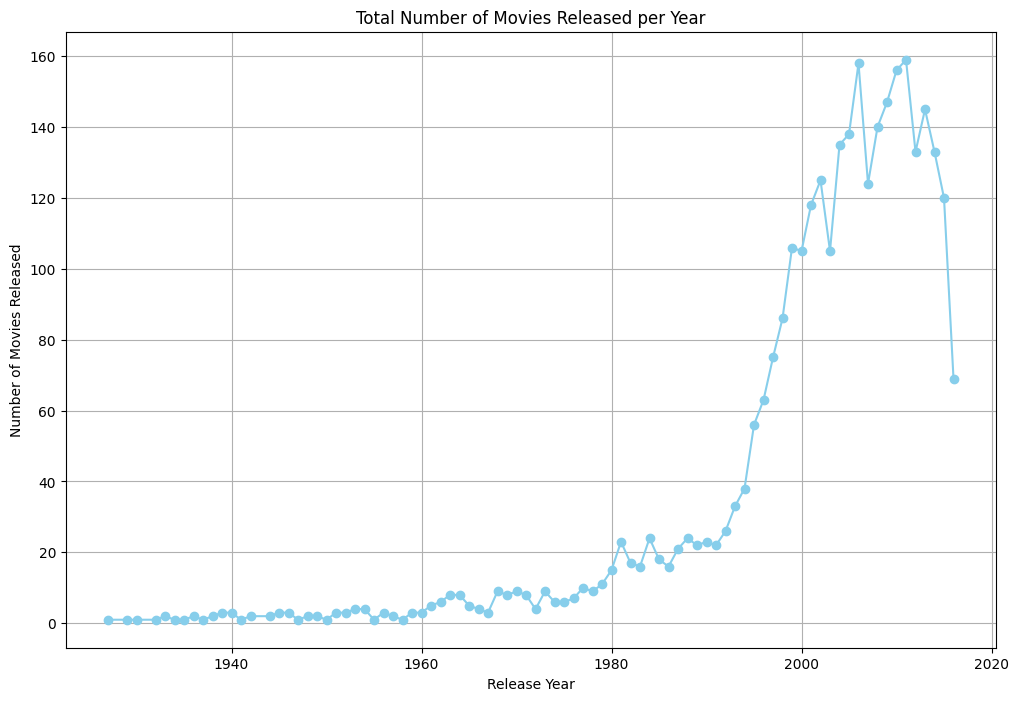

In [ ]:
# Group by release_year and count the number of movies per year
movies_per_year = df.groupby('release_year').size()

# Plotting
plt.figure(figsize=(12, 8))
movies_per_year.plot(kind='line', marker='o', color='skyblue')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Released')
plt.title('Total Number of Movies Released per Year')
plt.grid(True)
plt.show()


There has been a significant increase in the number of movies released annually, especially from 1980 onwards, peaking around the early 2010s before a decline towards 2020.The growth rate accelerates significantly from around 1980 onwards. The peak is observed around the late 2000s to early 2010s, with over 175 movies released in a single year.

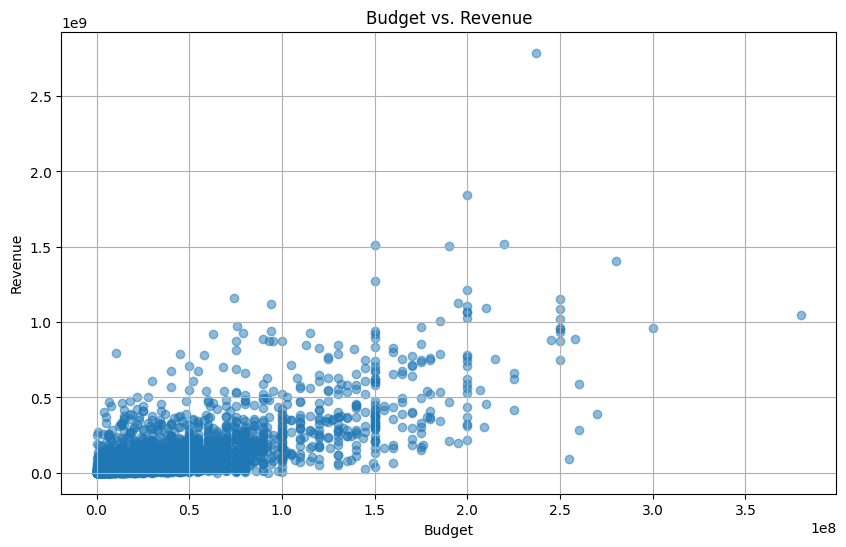

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['revenue'], alpha=0.5)
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


There is a general positive correlation between budget and revenue, meaning higher budget movies tend to generate higher revenues. However, the spread of revenue for any given budget is quite wide, indicating that not all high-budget movies are guaranteed high revenue. There are several outliers where movies with high budgets also achieved exceptionally high revenues.

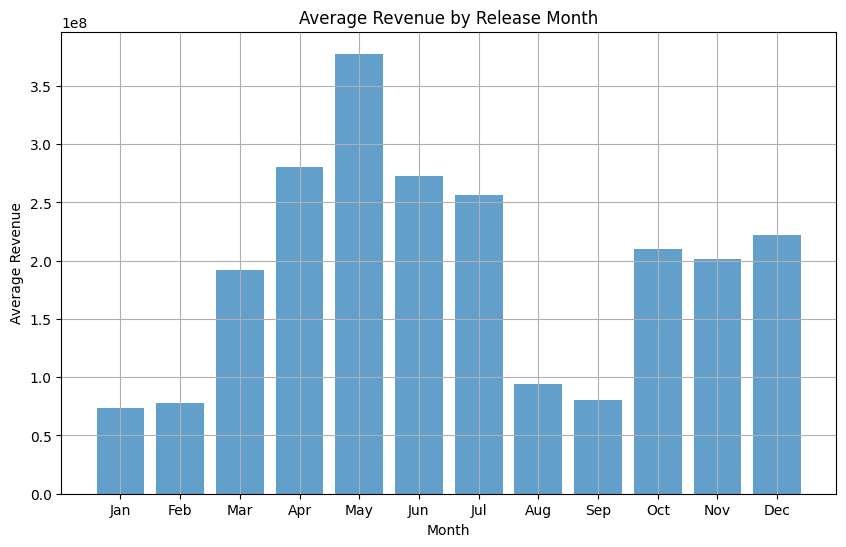

In [ ]:
average_revenue_by_month = df.groupby('release_month')['revenue'].mean()

plt.figure(figsize=(10, 6))
plt.bar(average_revenue_by_month.index, average_revenue_by_month.values, align='center', alpha=0.7)
plt.title('Average Revenue by Release Month')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


Movies released in May and June tend to have the highest average revenues, indicating these months might be favorable for blockbuster releases.
There are revenue peaks in November and December as well, suggesting the holiday season is also lucrative for movie releases.
The lowest average revenues are seen for movies released in January, February, August, and September, indicating these months might be less favorable for high revenue generation.

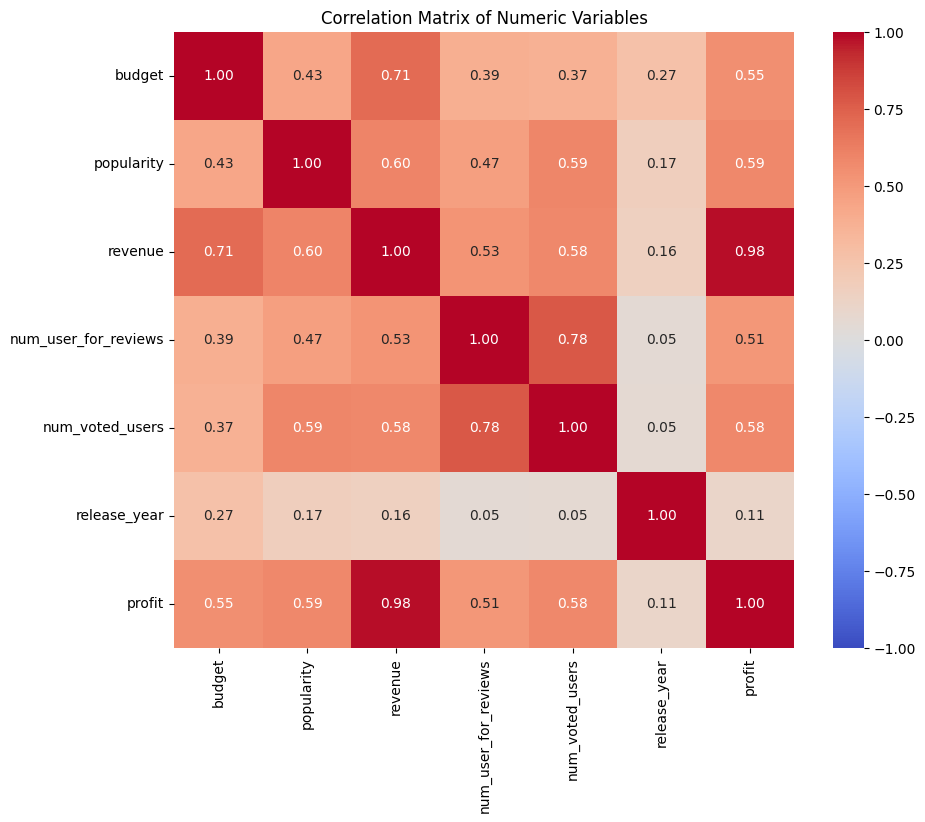

In [ ]:
numeric_columns = ['budget', 'popularity', 'revenue','num_user_for_reviews', 'num_voted_users', 'release_year', 'profit']

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


Revenue and Profit (0.98): The strongest correlation is between revenue and profit, which is nearly perfect, indicating that as revenue increases, profit tends to increase proportionally.


Revenue and Budget (0.71): There is a strong positive correlation between revenue and budget, suggesting that movies with higher budgets tend to generate higher revenues.


Profit and Budget (0.55): There's also a notable positive correlation between profit and budget, indicating that higher-budget movies are generally more profitable.


Popularity and Profit (0.59): Popularity has a positive correlation with profit, implying that more popular movies tend to be more profitable.


Popularity and Revenue (0.60): Popularity is also positively correlated with revenue, meaning that more popular movies tend to generate more revenue.


Number of User Reviews and Number of Voted Users (0.78): A strong correlation exists between num_user_for_reviews and num_voted_users, suggesting that movies with more user reviews also tend to have more user votes.


Release Year and Other Variables: The release year has relatively low correlations with other variables, indicating that it might not be a strong predictor of revenue, profit, or popularity.

<ipython-input-216-3c637fb55812>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_ten_genres = df.groupby('genres_x')['revenue'].sum().nlargest(10)


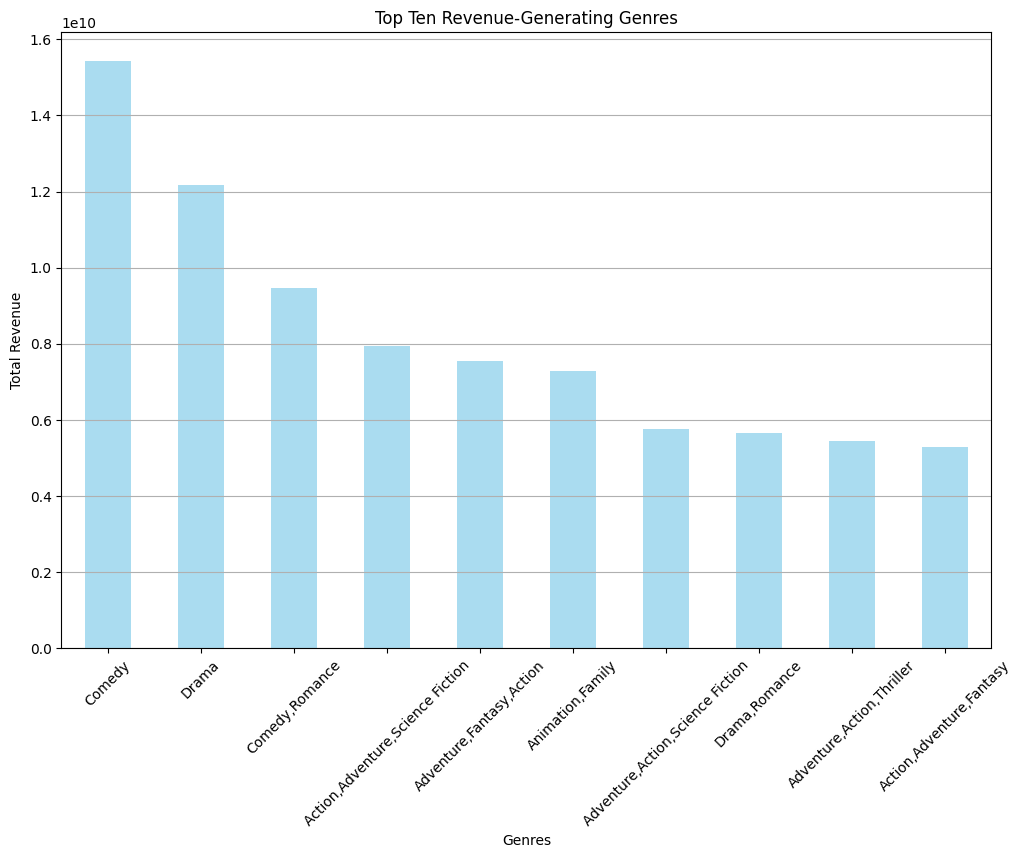

In [ ]:
# Group by genres and sum the revenue for each genre
top_ten_genres = df.groupby('genres_x')['revenue'].sum().nlargest(10)

# Plotting
plt.figure(figsize=(12, 8))
top_ten_genres.plot(kind='bar', color='skyblue',align='center', alpha=0.7)
plt.xlabel('Genres')
plt.ylabel('Total Revenue')
plt.title('Top Ten Revenue-Generating Genres')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show();


Comedy is the highest revenue-generating genre, with total revenue exceeding 1.6 x 10^10 (16 billion units, likely dollars).

Drama comes in second, generating about 1.3 x 10^10 in revenue.

Comedy Romance is the third highest-grossing genre, with revenue just under 1.0 x 10^10.

Action and Adventure genres appear frequently in various combinations (e.g., Action Adventure Science Fiction, Adventure Action Science Fiction, Adventure Fantasy Action), suggesting these are popular and lucrative genre combinations.

Family-oriented films (Animation Family) also feature in the top ten, indicating the importance of the family movie market.

<ipython-input-217-a5dffe4d44e4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_genres_popularity = df.groupby('genres_x')['popularity'].mean().nlargest(10)


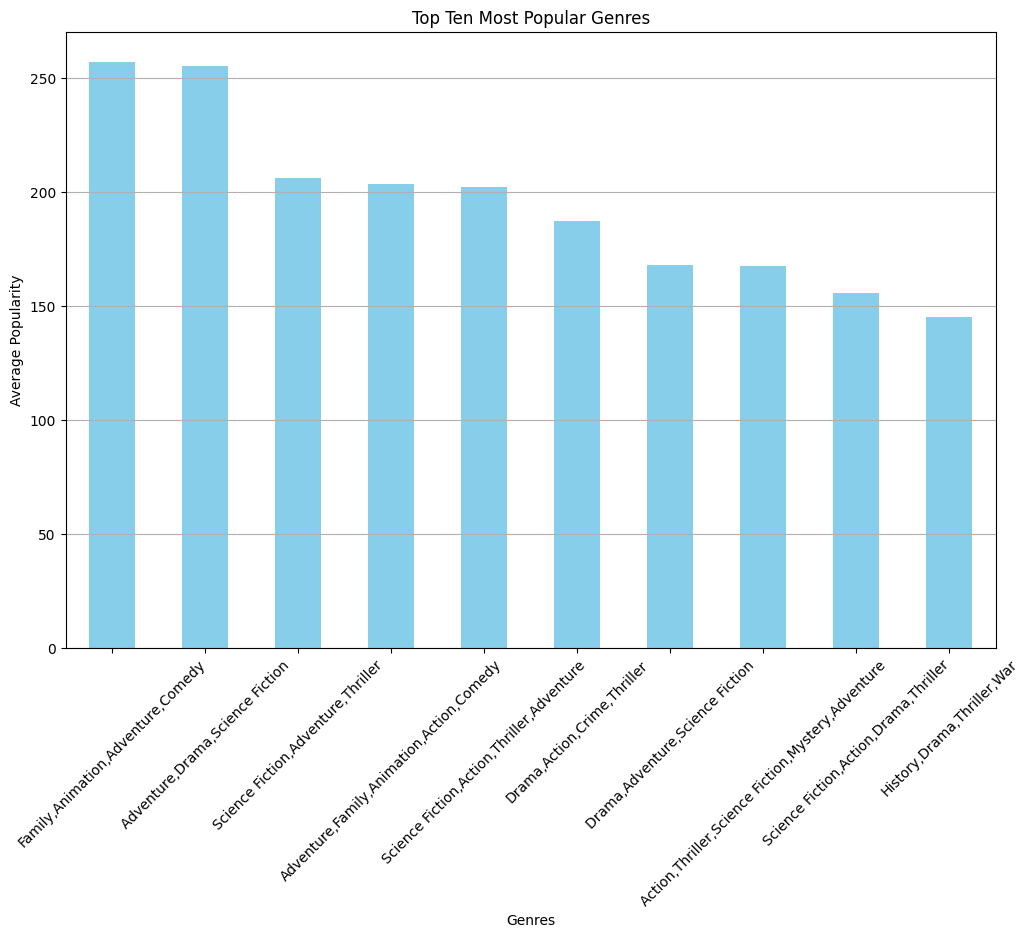

In [ ]:
# Group by genres and calculate the mean popularity for each genre
top_genres_popularity = df.groupby('genres_x')['popularity'].mean().nlargest(10)

# Plotting
plt.figure(figsize=(12, 8))
top_genres_popularity.plot(kind='bar', color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Average Popularity')
plt.title('Top Ten Most Popular Genres')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Family Animation Adventure Comedy is the most popular genre, with an average popularity score of about 260.

Adventure Drama Science Fiction comes in a close second, with a score just slightly below 260.

Science Fiction Adventure Thriller ranks third, with a score of about 210.

The top three genres all involve combinations of multiple genre elements, suggesting that films that blend different genres tend to be more popular.

Adventure appears in 6 out of the 10 top genres, indicating its broad appeal and versatility in combinations.

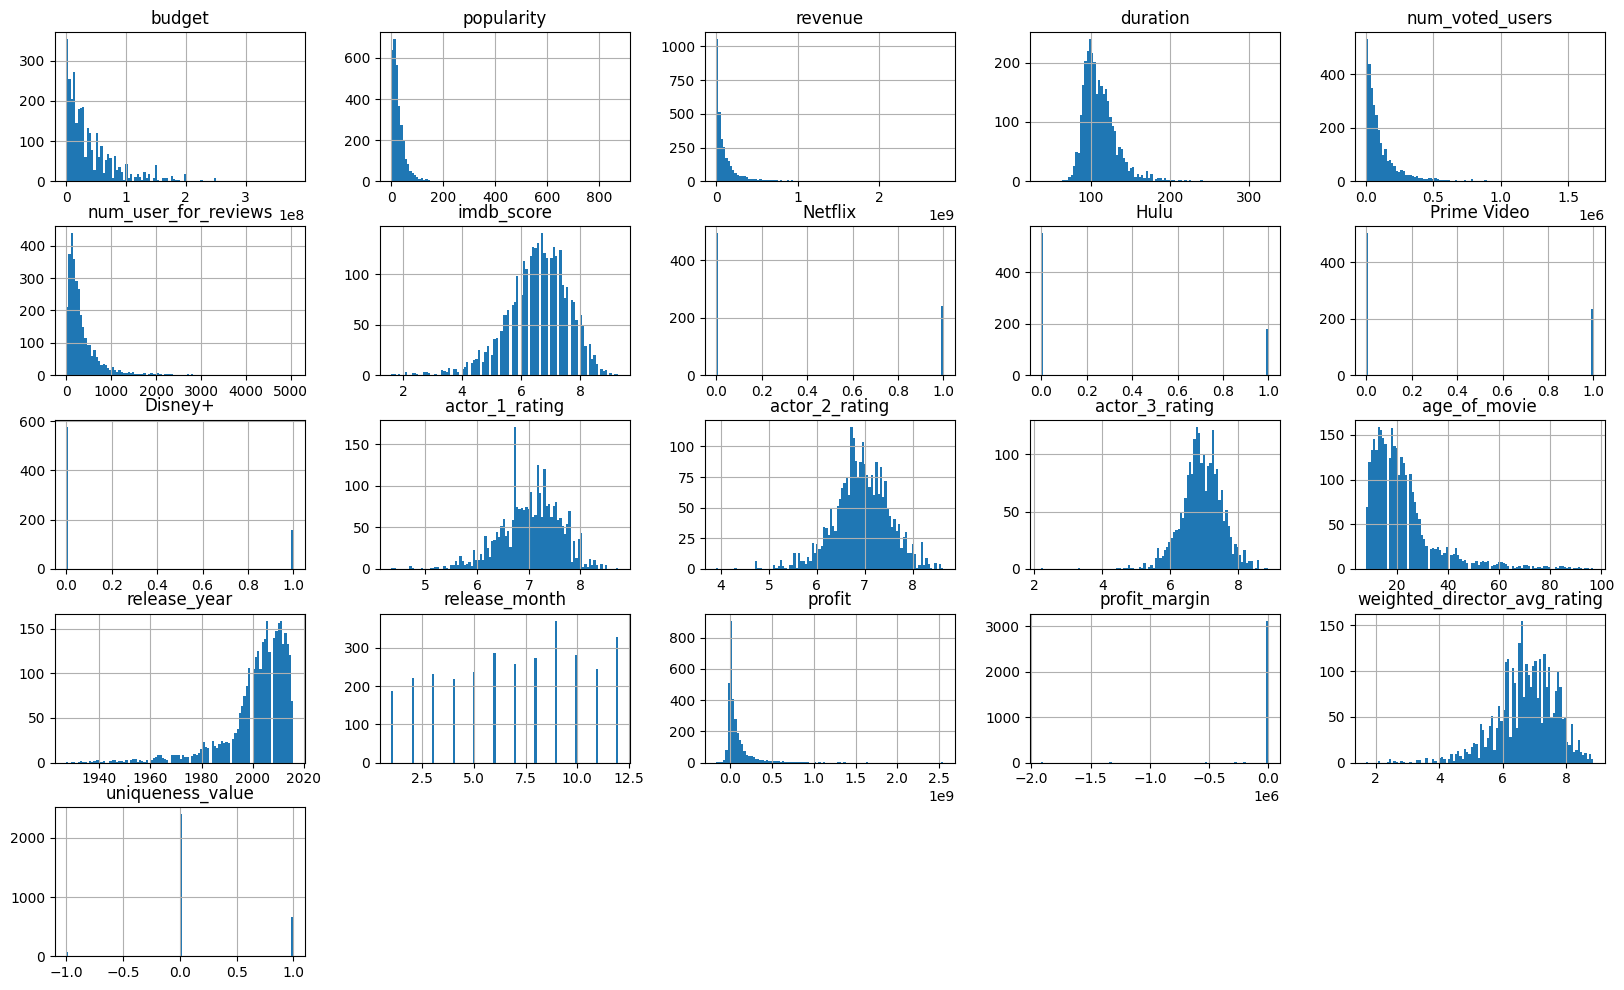

In [ ]:
df.hist(figsize= (20,12), bins =100)
plt.show()

Right-skewed distributions (e.g., budget, revenue, profit) indicate that while the majority of movies fall within a lower range, a few outliers significantly skew the data, which may impact the pricing model.


Normal distributions (e.g., IMDb score, actor ratings) indicate that these features are more evenly distributed and may have a more predictable influence on the pricing model.


Binary distributions (e.g., streaming platforms, uniqueness value) indicate the presence or absence of certain features, which can be useful for categorical analysis or binary classification in your model.

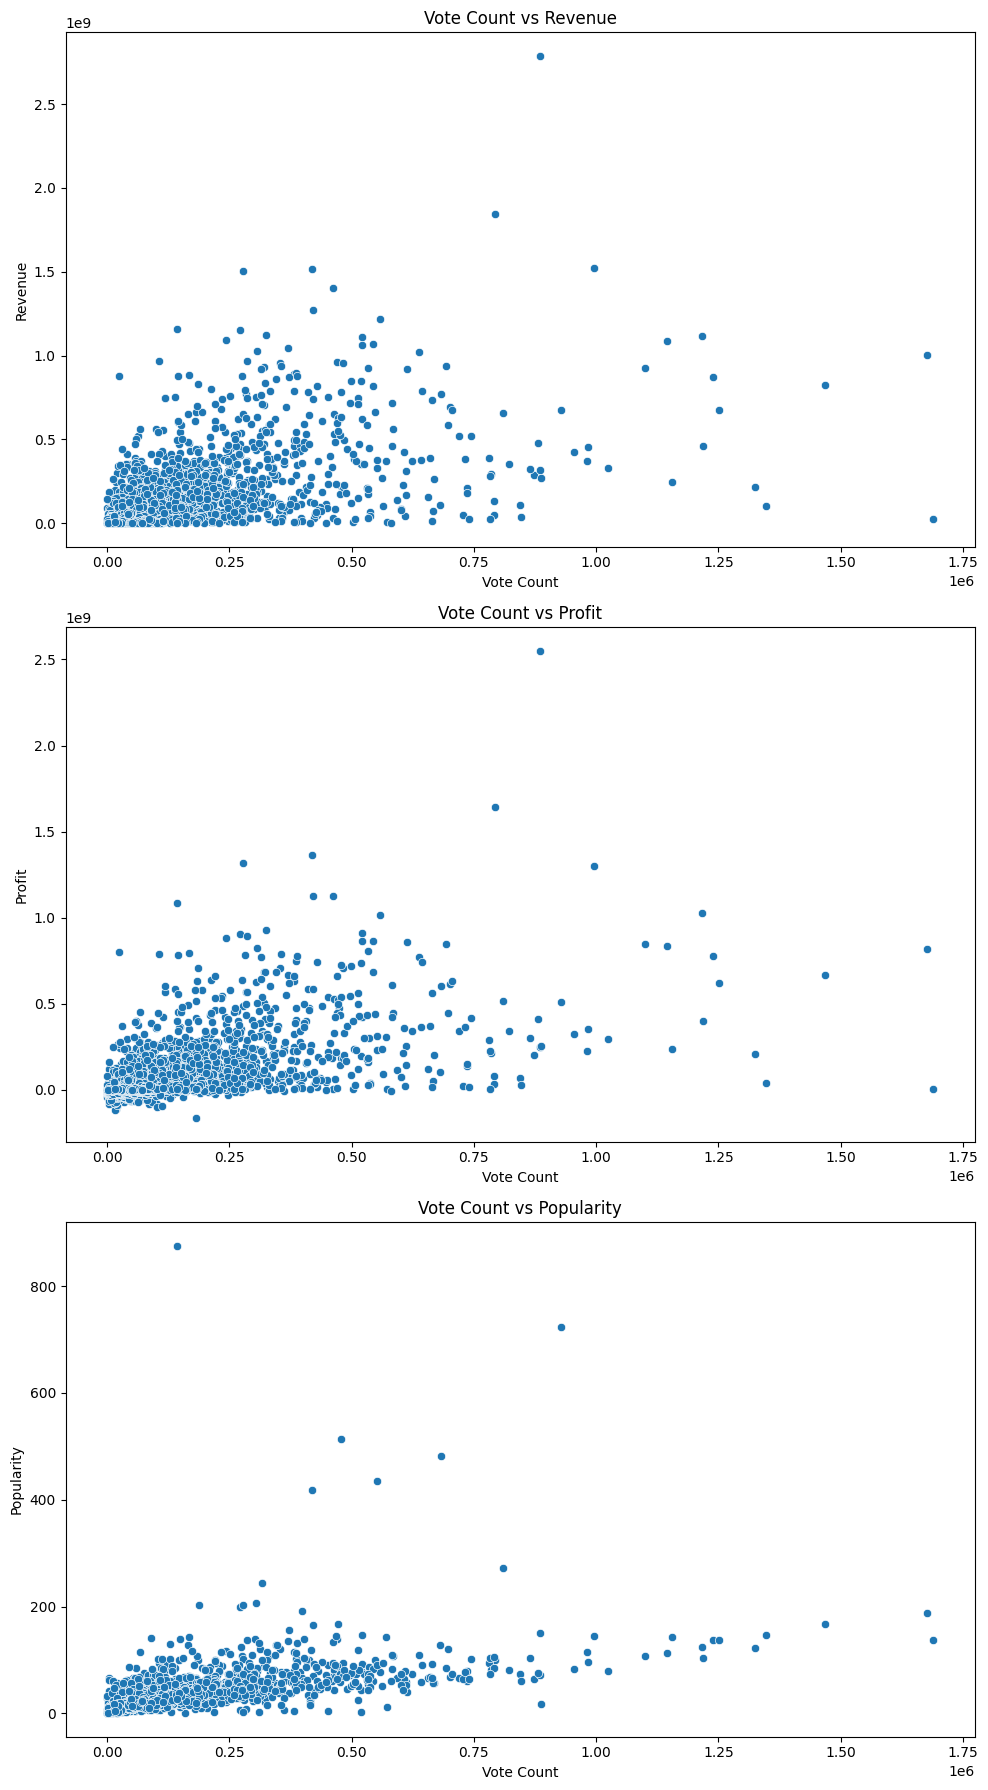

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot num_voted_users vs revenue
sns.scatterplot(x='num_voted_users', y='revenue', data=df, ax=axs[0])
axs[0].set_title('Vote Count vs Revenue')
axs[0].set_xlabel('Vote Count')
axs[0].set_ylabel('Revenue')

# Plot num_voted_users vs profit
sns.scatterplot(x='num_voted_users', y='profit', data=df, ax=axs[1])
axs[1].set_title('Vote Count vs Profit')
axs[1].set_xlabel('Vote Count')
axs[1].set_ylabel('Profit')

# Plot num_voted_users vs popularity
sns.scatterplot(x='num_voted_users', y='popularity', data=df, ax=axs[2])
axs[2].set_title('Vote Count vs Popularity')
axs[2].set_xlabel('Vote Count')
axs[2].set_ylabel('Popularity')

plt.tight_layout()
plt.show()


**Vote Count vs Revenue:**

There's a general positive correlation between vote count and revenue.
Most data points are clustered in the lower vote count range (0-4000).
Revenue appears to increase more rapidly as vote count increases.
There are a few outliers with high revenue and relatively low vote counts.


**Vote Count vs Profit:**

Similar to revenue, there's a positive correlation between vote count and profit.
The distribution of points is very similar to the revenue plot, suggesting a strong relationship between revenue and profit.
Profit values seem slightly lower than revenue values, which is expected.
There are some instances of high profits with relatively low vote counts.


**Vote Count vs Popularity:**

There's a positive correlation between vote count and popularity, but it's less pronounced than with revenue or profit.
The popularity scale seems to max out around 900, unlike revenue and profit which go into billions.
There's more scatter in this plot, indicating that factors other than vote count significantly influence popularity.
A few outliers show very high popularity with relatively low vote counts.



**General observations:**

All three metrics (revenue, profit, popularity) tend to increase with vote count, suggesting that more popular items (likely movies or products) generate more votes and more financial success.
The relationships aren't perfectly linear, indicating other factors are at play.

# Feature Importance

Revenue OLS Numerical Features

In [ ]:
# Define the dependent variable
y = df['revenue']


# Define the independent variables
independent_vars = ['budget', 'popularity', 'duration', 'num_user_for_reviews', 'num_voted_users', 'release_year', 'profit', 'profit_margin','age_of_movie','release_month']

# Standardize independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[independent_vars])

# Convert the scaled array back to a DataFrame for easier handling
df_scaled = pd.DataFrame(X_scaled, columns=independent_vars, index=df.index)

# Fit OLS models for each standardized variable
for col in independent_vars:
    X = sm.add_constant(df_scaled[col])

    # Fit OLS model
    model = sm.OLS(y, X)
    results = model.fit()

    # Print results summary
    print(f"\n\n===== OLS Regression Results for {col} =====")
    print(results.summary())




===== OLS Regression Results for budget =====
                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     3158.
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:04:43   Log-Likelihood:                -63004.
No. Observations:                3132   AIC:                         1.260e+05
Df Residuals:                    3130   BIC:                         1.260e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

**Budget and Popularity** are the most significant predictors of revenue, as evidenced by their high R-squared values and substantial coefficients.

**Duration, Number of User Reviews, and Number of Votes** also have a meaningful impact but to a lesser extent.

**Release Year** has a minimal impact on revenue, suggesting that newer or older movies don't necessarily generate more revenue based solely on the year of release.

**The profit** variable likely has a very strong relationship with revenue, potentially overshadowing other variables when included in a model.

These results highlight the importance of budget and popularity in determining a movie's revenue, which should be considered when developing a pricing strategy.

In [ ]:
df_with_dummies = pd.get_dummies(df, columns=['release_month'], drop_first=True)


In [ ]:
y = df['revenue']

independent_vars = ['release_month']

for col in independent_vars:
    X = sm.add_constant(df[col])

    # Fit OLS model
    model = sm.OLS(y, X)
    results = model.fit()

    # Print results summary
    print(f"\n\n===== OLS Regression Results for {col} =====")
    print(results.summary())



===== OLS Regression Results for release_month =====
                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.163
Date:                Sat, 10 Aug 2024   Prob (F-statistic):             0.0231
Time:                        00:07:48   Log-Likelihood:                -64094.
No. Observations:                3132   AIC:                         1.282e+05
Df Residuals:                    3130   BIC:                         1.282e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [ ]:
import statsmodels.formula.api as smf
model_months = smf.ols(formula='revenue ~ C(release_month)', data=df).fit()

print(model_months.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     21.15
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           5.49e-42
Time:                        00:08:02   Log-Likelihood:                -63983.
No. Observations:                3132   AIC:                         1.280e+05
Df Residuals:                    3120   BIC:                         1.281e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               5.65

Model Quality: The R-squared value indicates that the model explains only about 6.9% of the variability in revenue, which is quite low, suggesting that other factors not included in the model are likely influencing movie revenue.


Statistical Significance: The F-statistic and its associated p-value indicate that the model as a whole is statistically significant, but individual month effects vary.

In [ ]:
# Construct the formula for OLS regression
formula = 'revenue ~ C(genres_x)'

# Fit OLS model using the formula
model = smf.ols(formula=formula, data=df).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     2.613
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           7.44e-74
Time:                        00:09:01   Log-Likelihood:                -62963.
No. Observations:                3132   AIC:                         1.277e+05
Df Residuals:                    2226   BIC:                         1.332e+05
Df Model:                         905                                         
Covariance Type:            nonrobust                                         
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

**Statistical Significance**: Both the F-statistic and the associated p-value suggest that the model is statistically significant, meaning that the genres included in the model collectively have a significant impact on movie revenue.

**Adjustment:** The adjusted R-squared suggests that while the model fits reasonably well, adding more predictors (genres) doesn't improve the explanatory power substantially beyond the base model.

**Positive Impact**: Genres like Action, Adventure, Animation, Family, and combinations including Fantasy and Science Fiction consistently show positive impacts on revenue. This indicates that these genres tend to attract larger audiences or have higher box office appeal.

**Statistical Significance:** These results are statistically significant (p ≤ 0.05), indicating a high confidence level that the observed revenue differences are not due to random chance.

In [ ]:
# Construct the formula for OLS regression
formula = 'revenue ~ C(production_countries)'

# Fit OLS model using the formula
model = smf.ols(formula=formula, data=df_merged).fit()

# Print the summary of the regression results
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.317
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           1.53e-05
Time:                        00:09:28   Log-Likelihood:                -97312.
No. Observations:                4803   AIC:                         1.956e+05
Df Residuals:                    4334   BIC:                         1.986e+05
Df Model:                         468                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                                                  

**Model Fit**: Adjusted for the number of production countries, the adjusted R-squared is 2.0%, suggesting that the model may not fit the data well.

In [ ]:
# Construct the formula for OLS regression
formula = 'revenue ~ C(original_language)'

# Fit OLS model using the formula
model = smf.ols(formula=formula, data=df_merged).fit()

# Print the summary of the regression results
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.447
Date:                Sat, 10 Aug 2024   Prob (F-statistic):             0.0410
Time:                        00:10:33   Log-Likelihood:                -97606.
No. Observations:                4803   AIC:                         1.953e+05
Df Residuals:                    4766   BIC:                         1.955e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [ ]:
df_merged['cast'] = df_merged['cast'].astype(str)

def process_json_column(column):
    try:
        if pd.isna(column):
            return None
        column_list = json.loads(column)
        names = [entry['name'] for entry in column_list]
        return ', '.join(names)
    except Exception as e:
        print(f"Error processing column: {str(e)}")
        return None

df_merged['cast'] = df_merged['cast'].apply(process_json_column)

In [ ]:
df_merged['cast'] = df_merged['cast'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# Initialize an empty set for unique cast members
unique_cast = set()

# Function to update unique_cast with elements from each list
def update_unique_cast(x):
    if isinstance(x, list):
        unique_cast.update(x)

# Apply the function to each element in the 'cast' column
df_merged['cast'].apply(update_unique_cast)


,cast
0,None
1,None
2,None
3,None
4,None
...,...
4798,None
4799,None
4800,None
4801,None


In [ ]:
df_merged['cast'] = df_merged['cast'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 and isinstance(x[0], list) else x)

# Extract unique cast members
unique_cast = set()
df_merged['cast'].apply(unique_cast.update)

# Convert the set to a sorted list of unique cast members
unique_cast_list = sorted(unique_cast)

# Display the unique cast members
len(unique_cast_list)

54201

In [ ]:
# Calculate number of movies per actor
actor_movie_counts = {}
for actors in df_merged['cast']:
    for actor in actors:
        if actor in actor_movie_counts:
            actor_movie_counts[actor] += 1
        else:
            actor_movie_counts[actor] = 1

# Filter actors based on criteria
min_movies_per_actor = 5
filtered_actors = [actor for actor, count in actor_movie_counts.items() if count >= min_movies_per_actor]

# Create dummy variables for filtered actors
actors_df = pd.DataFrame(0, index=df_merged.index, columns=filtered_actors)

for i, row in df_merged.iterrows():
    for actor in row['cast']:
        if actor in filtered_actors:
            actors_df.loc[i, actor] = 1

# Concatenate actors dummy variables with original dataframe
df_merged_with_dummies = pd.concat([df_merged, actors_df], axis=1)

# Prepare data for OLS model
X = df_merged_with_dummies[filtered_actors]  # Use only filtered actor columns
X = sm.add_constant(X)
y = df_merged_with_dummies['revenue']

# Fit OLS model
model = sm.OLS(y, X).fit()

# Print OLS model summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     6.964
Date:                Sat, 10 Aug 2024   Prob (F-statistic):          3.12e-219
Time:                        00:13:15   Log-Likelihood:                -89678.
No. Observations:                4803   AIC:                         1.870e+05
Df Residuals:                    1001   BIC:                         2.116e+05
Df Model:                        3801                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

 These indicate the statistical significance of each coefficient. A low p-value (typically < 0.05) suggests that the coefficient is statistically significant and that the predictor variable has a significant impact on revenue.

 The adjusted R-squared is 0.811, which adjusts the R-squared value based on the number of independent variables in the model. It penalizes the R-squared for including more predictors, giving a more realistic assessment of the model's goodness of fit.



In [ ]:
# Construct the formula for OLS regression
formula = 'revenue ~ C(spoken_languages)'

# Fit OLS model using the formula
model = smf.ols(formula=formula, data=df_merged).fit()

# Print the summary of the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     1.476
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           9.98e-11
Time:                        00:13:19   Log-Likelihood:                -97218.
No. Observations:                4803   AIC:                         1.955e+05
Df Residuals:                    4259   BIC:                         1.990e+05
Df Model:                         543                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                                                  

**Model Fit:** The low R-squared and adjusted R-squared values (0.150 and 0.024, respectively) indicate that this model does not fit the data well in terms of explaining movie revenue variability. Most of the variability in revenue is not captured by the model.

**Statistical Significance**: While the model is statistically significant (due to the significant F-statistic), the low R-squared suggests that the predictors included (spoken languages) might not adequately explain revenue variations.

# Linear Regression Model

In [ ]:
df = df.dropna(subset=['actor_rating'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2968 entries, 0 to 3129
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   director_name                 2968 non-null   object 
 1   duration                      2968 non-null   float64
 2   actor_2_name                  2968 non-null   object 
 3   genres_x                      2968 non-null   object 
 4   actor_1_name                  2968 non-null   object 
 5   movie_title                   2968 non-null   object 
 6   num_voted_users               2968 non-null   int64  
 7   actor_3_name                  2968 non-null   object 
 8   num_user_for_reviews          2968 non-null   float64
 9   language                      2968 non-null   object 
 10  country                       2968 non-null   object 
 11  imdb_score                    2968 non-null   float64
 12  budget                        2968 non-null   int64  
 13  populari

In [ ]:
# Function to process genres
def process_genres(genres_string, all_genres):
    genres = genres_string.split('|')
    return pd.Series({genre: 1 if genre in genres else 0 for genre in all_genres})


# Process genres
genre_features = df['genres_x'].apply(lambda x: process_genres(x, all_genres))

# Define features and target
numeric_features = ['duration', 'num_voted_users', 'num_user_for_reviews', 'imdb_score', 'weighted_director_avg_rating','age_of_movie','actor_rating','uniqueness_value']

features = numeric_features + all_genres

target = 'log_revenue'

# Prepare the feature matrix and target vector
X = pd.concat([df[numeric_features], genre_features], axis=1)
y = df[target]

# Ensure the model is trained
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_scaled, y)

# Calculate the log of predicted price using the model with base price as 1.99
log_price_199 = model.predict(X_scaled)-model.intercept_+1.99

# Convert the log price back to actual price
df['predicted_price_199'] = log_price_199

# Calculate the log of predicted price using the model with base price as 3.99
log_price_399 = model.predict(X_scaled)-model.intercept_+3.99

# Convert the log price back to actual price
df['predicted_price_399'] = log_price_399

# Display the first few rows to check the results
print(df[['movie_title', 'predicted_price_199','predicted_price_399']])

# Pricing formula
intercept = 1.99
formula = f"log(Price) = {intercept:.2f}"
for feature, coef in zip(features, model.coef_):
    formula += f" + {coef:.2f} * {feature}"

print("\nPricing Formula:")
print(formula)

                                   movie_title  predicted_price_199  \
0                                       avatar             7.475485   
1     pirates of the caribbean: at world's end             5.126563   
2                                      spectre             4.539951   
3                        the dark knight rises             8.075931   
4                                  john carter             3.374775   
...                                        ...                  ...   
3125                            tiny furniture             1.067503   
3126                                the signal             1.449729   
3127                              down terrace             0.286852   
3128                                    clerks             2.069820   
3129                            pink flamingos             0.605136   

      predicted_price_399  
0                9.475485  
1                7.126563  
2                6.539951  
3               10.075931  
4      

# RandomForestRegressor

In [ ]:
# Step 1: Select features for the model
numeric_features = ['duration', 'num_voted_users', 'imdb_score',
                    'popularity', 'age_of_movie','actor_rating']


# Add 'weighted_avg_rating' if it exists
if 'weighted_director_avg_rating' in df.columns:
    numeric_features.append('weighted_director_avg_rating')

# Add 'uniqueness_value' if it exists
if 'uniqueness_value' in df.columns:
    numeric_features.append('uniqueness_value')

# Add genre features
genre_features = [col for col in df.columns if col.startswith('genre_')]


features = numeric_features + genre_features

# Step 2: Prepare the data
X = df[features]
y = df['log_revenue']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Step 4: Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Step 5: Get feature importances
importances = rf_model.feature_importances_
feature_imp = pd.DataFrame({'feature': features, 'importance': importances})
feature_imp = feature_imp.sort_values('importance', ascending=False).reset_index(drop=True)
print("\nTop 10 Most Important Features:")
print(feature_imp)

Mean Squared Error: 2.031078435585948
R-squared Score: 0.5343816218974073

Top 10 Most Important Features:
                         feature    importance
0                     popularity  2.913083e-01
1                num_voted_users  2.687737e-01
2                       duration  7.547731e-02
3                   age_of_movie  7.151783e-02
4                     imdb_score  5.720836e-02
5   weighted_director_avg_rating  5.505024e-02
6                   actor_rating  5.386303e-02
7                   genre_Family  1.978076e-02
8                genre_Adventure  1.268799e-02
9               uniqueness_value  1.215169e-02
10                  genre_Horror  9.877461e-03
11                 genre_Mystery  9.527499e-03
12                  genre_Sci-Fi  8.774370e-03
13                genre_Thriller  7.420392e-03
14                   genre_Drama  6.867604e-03
15                 genre_Fantasy  6.706015e-03
16                  genre_Comedy  5.691944e-03
17                   genre_Crime  5.545053e-03


In [ ]:
def calculate_rental_price(row, base_price=1.99, importance_dict=None):
    if importance_dict is None:
        importance_dict = {
            'popularity': 0.291308,
            'num_voted_users': 0.268774,
            'duration': 0.075477,
            'age_of_movie': 0.071518,
            'imdb_score': 0.057209,
            'weighted_director_avg_rating': 0.055050,
            'actor_rating': 0.053863,
            'genre_Family': 0.019781,
            'genre_Adventure': 0.012688,
            'uniqueness_value': 0.012152,
            'genre_Horror': 0.009877,
            'genre_Mystery': 0.009527,
            'genre_Sci-Fi': 0.008774,
            'genre_Thriller': 0.007420,
            'genre_Drama': 0.006868,
            'genre_Fantasy': 0.006706,
            'genre_Comedy': 0.005692,
            'genre_Crime': 0.005545,
            'genre_Romance': 0.004915,
            'genre_Action': 0.004523,
            'genre_War': 0.002262,
            'genre_Music': 0.002219,
            'genre_Western': 0.001966,
            'genre_Biography': 0.001948,
            'genre_Animation': 0.001512,
            'genre_History': 0.001164,
            'genre_Sport': 0.000822,
            'genre_Musical': 0.000311,
            'genre_Documentary': 0.000116,
            'genre_Film-Noir': 0.000012,
            'genre_News': 0.0000002
        }

    price = base_price

    for feature, importance in importance_dict.items():
        if feature in row:
            # Normalize the feature value
            feature_mean = X[feature].mean()
            feature_std = X[feature].std()
            feature_value = (row[feature] - feature_mean) / feature_std

            # Adjust price based on feature importance and value
            price_adjustment = feature_value * importance

            # Special handling for age_of_movie (inverse relationship)
            if feature == 'age_of_movie':
                price_adjustment = -price_adjustment

            price += price_adjustment

    # Ensure the price is not negative and round to two decimal places
    return max(1.99, round(price, 2))

# Apply the pricing function to the dataset
df['rental_price'] = df.apply(calculate_rental_price, axis=1)

In [ ]:
pricing_features = ['movie_title', 'imdb_score', 'popularity', 'uniqueness_value', 'age_of_movie',
                    'duration', 'rental_price']
pricing_df = df[pricing_features]

# Step 9: Export to Excel
excel_filename = 'movie_rental_prices_feature_importance.xlsx'
pricing_df.to_excel(excel_filename, index=False)
print(f"\nExcel file '{excel_filename}' has been created with rental prices and pricing features.")


Excel file 'movie_rental_prices_feature_importance.xlsx' has been created with rental prices and pricing features.
